# TP1 Rule-based Chatbot - 6 November 2024 - Emma DESTÉ

## <span style="color:red; font-weight:bold;">1) Regex</span>

- Any word (means only alphanumeric characters) in the paragraph with a length of 4

In [1]:
import re  # library to test regex

In [2]:
regex1 = r'\b\w{4}\b'
# \b to define boundaries : see documentation https://docs.python.org/3/library/re.html

In [3]:
sentence = "My fun fact is that I did aerial acrobatics during 6 years, a circus sport. Test 1234"

print(re.findall(regex1, sentence))
# findall(pattern, paragraph) to match words in a sentence : see documentation https://docs.python.org/3/library/re.html

['fact', 'that', 'Test', '1234']


- A duplication in the sentence that contain 2 same words separated by space, for example “ Paris in the the spring.”

In [4]:
regex2 = r'\b(\w+)\s+\1\b'
# () to catch only the duplicate word

In [5]:
sentence = "Paris in the the spring."

print(re.findall(regex2, sentence))

['the']


- A string containing the email address, for example, name@gmail.com. Make 1 big group and 2 nested ones to capture the name and the domain (e.g. gmail) using the same regex pattern.

In [6]:
regex3 = r'((\S+)@(\w+)\.com)'
# regex3 = r'((\w+)@(\w+).com)' if name must be alphanumeric
# () to ≠ capture groups

In [7]:
email = "emma@efrei.com"

mail = re.match(regex3, email)
# match(pattern, string) to check 0 or more characters at the beginning of string match the regex : see documentation https://docs.python.org/3/library/re.html
print("Full email :", mail.group(1))
print("Name :", mail.group(2))
print("Domain :", mail.group(3))

Full email : emma@efrei.com
Name : emma
Domain : efrei


- A string that represents time in HH:mm:ss format. HH is hours between 01 and 12. mm and ss represent minutes and seconds, and each is between 00 and 59. Valid examples include 01:26:18 and 11:00:39. Invalid examples include 13:01:01, 00:00:00, and 01:00:60.

In [8]:
regex4 = r'^(0[1-9]|1[0-2]):[0-5][0-9]:[0-5][0-9]$'
# 0 followed by any digit except 0, but 1 followed by 0 1 or 2 only

In [9]:
print("11:26:18", bool(re.match(regex4, "11:26:18")))
print("11:00:39", bool(re.match(regex4, "11:00:39")))
print("13:01:01", bool(re.match(regex4, "13:01:01")))
print("00:00:00", bool(re.match(regex4, "00:00:00")))
print("01:00:60", bool(re.match(regex4, "01:00:60")))

11:26:18 True
11:00:39 True
13:01:01 False
00:00:00 False
01:00:60 False


- Write a regex expression that extracts information from a debug file, where we need to capture the filename, method name, and line number from the lines. Capture infor from lines that follow the form “at package.class.methodname(filename:linenumber)”

In [10]:
regex5 = r'at\s+[\w\.]+\.([\w]+)\(([\w\.]+):(\d+)\)'
# should contain at [package] (classe) (methodname) ((filename):(linenumber))

In [11]:
debug_lines = [
    "E/( 1553): at widget.List.makeView(ListView.java:1727)",
    "E/( 1553): at widget.List.fillDown(ListView:652)",
    "E/( 1553): at widget.List.fillFrom(Hello_world:709)",
    "W/dalvikvm( 1553): threadid=1: uncaught exception",
    "E/( 1553): FATAL EXCEPTION: main",
    "E/( 1553): java.lang.StringIndexOutOfBoundsException"
]

for l in debug_lines:
    match = re.search(regex5, l)
    # search(pattern, string) to locate a match anywhere in string
    if match:
        method_name = match.group(1)
        filename = match.group(2)
        line_number = match.group(3)
        print(f" ✅ Match method {method_name}, filename {filename}, line {line_number}")
    else:
        print(f"Don't match {l}")

 ✅ Match method makeView, filename ListView.java, line 1727
 ✅ Match method fillDown, filename ListView, line 652
 ✅ Match method fillFrom, filename Hello_world, line 709
Don't match W/dalvikvm( 1553): threadid=1: uncaught exception
Don't match E/( 1553): FATAL EXCEPTION: main
Don't match E/( 1553): java.lang.StringIndexOutOfBoundsException


- You are given a string containing a mix of words, symbols, and whitespace. Your task is to use regular expressions to format the string such that:

-Each word and symbol sequence is separated by a single space.

-Allowed characters in each sequence include alphanumeric characters, underscores (_), and the symbols ', /, +, $, space, -

-All other symbols should be separated by a single space.

-Any extra whitespace should be removed.

In [12]:
# -> Preprocessing the data
def regex6(input_msg):

    # 1) define authorized symbols & add spaces around
    str_msg = re.sub(r"([^a-zA-Z0-9_/$+\-])", r" \1 ", input_msg)
    
    # 2) Remove extra spaces
    str_msg = re.sub(r"\s+", " ", str_msg).strip()

    return str_msg

In [13]:
strings = [
    "Hello, World!$500 +enjoy chatbot-2024.",
    "Total is $100+$20 - discount.",
    "Python/regex - quick_example!End"
]

for s in strings:
    print(s)
    print('=> ', regex6(s))

Hello, World!$500 +enjoy chatbot-2024.
=>  Hello , World ! $500 +enjoy chatbot-2024 .
Total is $100+$20 - discount.
=>  Total is $100+$20 - discount .
Python/regex - quick_example!End
=>  Python/regex - quick_example ! End


## <span style="color:red; font-weight:bold;">2) NLTK</span>

In [14]:
import nltk
from nltk.chat.util import Chat, reflections

In [15]:
print(reflections)

{'i am': 'you are', 'i was': 'you were', 'i': 'you', "i'm": 'you are', "i'd": 'you would', "i've": 'you have', "i'll": 'you will', 'my': 'your', 'you are': 'I am', 'you were': 'I was', "you've": 'I have', "you'll": 'I will', 'your': 'my', 'yours': 'mine', 'you': 'me', 'me': 'you'}


Rules set up :

In [16]:
pairs = [
    [ r"my name is (.*)"
    ,
    [" Hello %1, How are you today ?" ,]
    ],
    [ r"hi|hey| hello"
    ,
    [" Hello "
    ,
    "Hey there " ,]
    ],
    [ r"how are you ?"
    ,
    ["I'm doing good , and How about You ?" ,]
    ],
    [ r" what is your name ?"
    ,
    ["I am a bot created test . you can call me Bot!" ,]
    ],
    [ r" sorry (.*)"
    ,
    ["Its alright "
    ,
    "Its OK , never mind " ,]
    ],
    [ r" (.*) age?"
    ,
    ["I'm a computer program , seriously you are asking me this ?" ,]
    ],
    
    [ r"tell me a joke"
    ,
    ["Why can't cats work on the computer? They get too distracted chasing the mouse around. " ,]
    ],
    [ r"can you (.*)?"
    ,
    ["Of course I can %1, but please don't ask me I'm shy " ,]
    ],
    [ r"i feel sad (.*)"
    ,
    ["Sorry to hear that, maybe you can talk to your friends or call a professionnal at 09 72 39 40 50" ,]
    ],
    [ r"i hate (.*)"
    ,
    ["Hate is a strong word, poor %1. Let’s find something you enjoy more! Like aquaponey 🐎" ,]
    ]
]

Conversation with the bot :

In [17]:
def chat():
    print ("Hi! I am Bot")
    chat = Chat(pairs, reflections)

    # write quit to stop the conversation
    if input().lower() != "quit":
        response = chat.converse()
    else:
        print("Bot: Goodbye! Have a nice day!")

In [18]:
chat()

Hi! I am Bot
hi
>can you sing?
Of course I can sing?, but please don't ask me I'm shy 
>tell me a joke
Why can't cats work on the computer? They get too distracted chasing the mouse around. 
>quit
None


## <span style="color:red; font-weight:bold;">3) Rule-based Weather Bot </span>

<span style="color:green; font-weight:bold;">1 - Intents & Responses</span>

- Step 1 : Building a keywords dictionary where the values are the keywords and the key is the corresponding intent


In [19]:
intent_keywords = {
    'greetings': ['hello', 'howdy', 'hi', 'hullo', 'how do you do', 'hey'],
    'time': ['time', 'clock', 'what time', 'hours', 'minute', 'second'],
    'ending': ['goodbye', 'bye', 'see you', 'take care', 'farewell', 'catch you later'],
    
    'thanks': ['thank you', 'thanks', 'thanks a lot', 'many thanks', 'much appreciated'],
    'apology': ['sorry', 'my bad', 'apologies', 'excuse me', 'pardon me', 'i apologize'],
    'help': ['help', 'assist', 'support', 'need assistance', 'help me'],
    'affirmation': ['yes', 'yeah', 'yep', 'of course', 'definitely', 'sure'],
    'location': ['where', 'located', 'find', 'address', 'place'] 
}

- Step 2 : Building the responses dictionnary

In [20]:
responses = {
    'greetings': [
        "Hello! How can I help you today?",
        "Hi, you look well today!",
        "Welcome here!",
        "Hiii... I am a bot, how are you?",
        "Hey there, how's it going?",
        "Hello, how can I assist you today?",
    ],
    'time': [
        "The current time is 3:45 PM.",
        "It's 10:30 in the morning right now.",
        "The time is 8:00 AM, bright and early!",
        "It’s 6:45, almost time for dinner!",
        "It's 1:00 PM, right after lunch!"
    ],
    'ending': [
        "Goodbye! Have a great day!",
        "Take care, hope to chat soon!",
        "Bye, and feel free to come back anytime!",
        "Catch you later, take care!",
        "Goodbye, and best wishes!"
    ],
    
    'thanks': [
        "You're welcome! 😊",
        "No problem at all!",
        "Glad I could help!",
        "You're very welcome!",
        "Anytime! Happy to help!"
    ],
    'apology': [
        "Sorry about that! How can I assist you better?",
        "My bad! Please forgive me.",
        "I apologize for the inconvenience!",
        "Oops, I’m sorry. Let me fix that!"
    ],
    'help': [
        "How can I assist you today?",
        "What do you need help with?",
        "I'm here to help! How can I assist you?",
        "Please tell me how I can help.",
        "What’s on your mind? I can help!"
    ],
    'affirmation': [
        "Yes, absolutely!",
        "Of course we agree!",
        "Sure thing!",
        "Definitely!",
        "For sure!"
    ],
    'location': [
        "I’m here to help you. Where exactly are you trying to go?",
        "Can you specify the location?",
        "Could you give me more details about the place?",
        "Where exactly are you looking for?",
        "What’s the address you need help with?",
    ]
}

<span style="color:green; font-weight:bold;">2 - WordNet</span>

WordNet = lexical database that defines the semantic relationships between words

In [21]:
import nltk
from nltk.corpus import wordnet as wn

# to avoid error : Resource wordnet not found. Please use the NLTK Downloader to obtain the resource
nltk.download('wordnet')
#nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/emma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
def extend_1keyword(keyword):
    synonyms = set()

    # see main functions described in https://www.nltk.org/howto/wordnet.html
    for syn in wn.synsets(keyword): 
        for lemma in syn.lemmas():
            lemma_name = lemma.name().lower()  # extract name and convert to lowercase

            # Avoid words with special characters or accented letters
            if re.match(r'^[a-zA-Z0-9_]+$', lemma_name):
                synonyms.add(lemma_name)

    synonyms = list(synonyms)
    return synonyms
    

def extend_keywords(my_keywords_dict):
    """
    This function extends the keywords dictionary by adding synonyms for each keyword.
    """
    extended_keywords_dict = {}  # initializing the new dictionnary
    
    for intent, keywords in my_keywords_dict.items():
        extended_keywords = set(keywords)  # start with original keywords
        
        
        # For each keyword, find synonyms in WordNet and add them to the set
        for keyword in keywords:
            synonyms_keyword = extend_1keyword(keyword)
            extended_keywords.update(synonyms_keyword)  # add synonyms to the set
        
        # Store the extended keyword list for this intent
        extended_keywords_dict[intent] = list(extended_keywords)
    
    return extended_keywords_dict

In [23]:
#print(intent_keywords)
extended_keywords_dict = extend_keywords(intent_keywords)

for intent, keywords in extended_keywords_dict.items():
    print(intent, ' : ', keywords)
    print('----------')

greetings  :  ['how do you do', 'hi', 'hawaii', 'aloha_state', 'hullo', 'hey', 'hello', 'howdy']
----------
time  :  ['bit', 'second_base', 'time_of_day', 'hr', 'second', 'clip', 'secondment', 'fourth_dimension', 'hour', 'min', '2d', 'endorse', 'what time', 'mo', 'time', 'indorsement', 'minute', 'hours', 'prison_term', 'minute_of_arc', 'second_gear', 'arcsecond', '60_minutes', 'narrow', 'back', 'moment', 'sec', 'infinitesimal', 'meter', 'endorsement', 'secondly', 'clock_time', 'sentence', 'indorse', 'clock', 's', 'metre', 'irregular', 'arcminute', '2nd', 'instant']
----------
ending  :  ['catch you later', 'goodbye', 'word_of_farewell', 'leave', 'take care', 'au_revoir', 'good_day', 'parting', 'bye', 'farewell', 'arrivederci', 'see you', 'goodby', 'sayonara', 'pass', 'adios', 'auf_wiedersehen', 'cheerio', 'so_long', 'adieu']
----------
thanks  :  ['thanks a lot', 'thank', 'much appreciated', 'many thanks', 'thanks', 'thank you', 'give_thanks']
----------
apology  :  ['apologia', 'pitif

Indeed, now the dictionnary contains way more keywords. 

<span style="color:green; font-weight:bold;">3 - Matcher function</span>

First, let's reformat the regex pattern corresponding to my list of keywords.

In [24]:
def word_to_regex(keywords_dict):
    regex_dict = {}
    regex_wordBegin = '.*\\b'
    regex_wordEnd = '\\b.*|'  # add | in the pattern but remove the last occurence at the end of the loop
    
    for intent, keywords in keywords_dict.items():
        keyword_reg = ''
        
        for keyword in keywords:
            
            if '_' in keyword: # nobody will write underscore when typing, so I remove this sign from keywords
                keyword = keyword.replace('_', ' ')
            
            keyword_reg = keyword_reg + regex_wordBegin + keyword + regex_wordEnd
            
        keyword_reg = keyword_reg[:-1]  # remove the last | to avoid a syntax error
        
        regex_dict.update({intent : keyword_reg})
        
    return regex_dict

Here is an example of what I want to obtain : {'greetings ': '.*\\bhullo\\b .*|.*\\bhow-do-you-do\\b.*|.*\\bhowdy\\b.*|.*\\bhello\\b.*|.*\\bhi\\b.*'}

In [25]:
regex_dict = word_to_regex(extended_keywords_dict)

for intent, keywords in regex_dict.items():
    print(intent, ':', keywords)
    print('----------')

greetings : .*\bhow do you do\b.*|.*\bhi\b.*|.*\bhawaii\b.*|.*\baloha state\b.*|.*\bhullo\b.*|.*\bhey\b.*|.*\bhello\b.*|.*\bhowdy\b.*
----------
time : .*\bbit\b.*|.*\bsecond base\b.*|.*\btime of day\b.*|.*\bhr\b.*|.*\bsecond\b.*|.*\bclip\b.*|.*\bsecondment\b.*|.*\bfourth dimension\b.*|.*\bhour\b.*|.*\bmin\b.*|.*\b2d\b.*|.*\bendorse\b.*|.*\bwhat time\b.*|.*\bmo\b.*|.*\btime\b.*|.*\bindorsement\b.*|.*\bminute\b.*|.*\bhours\b.*|.*\bprison term\b.*|.*\bminute of arc\b.*|.*\bsecond gear\b.*|.*\barcsecond\b.*|.*\b60 minutes\b.*|.*\bnarrow\b.*|.*\bback\b.*|.*\bmoment\b.*|.*\bsec\b.*|.*\binfinitesimal\b.*|.*\bmeter\b.*|.*\bendorsement\b.*|.*\bsecondly\b.*|.*\bclock time\b.*|.*\bsentence\b.*|.*\bindorse\b.*|.*\bclock\b.*|.*\bs\b.*|.*\bmetre\b.*|.*\birregular\b.*|.*\barcminute\b.*|.*\b2nd\b.*|.*\binstant\b.*
----------
ending : .*\bcatch you later\b.*|.*\bgoodbye\b.*|.*\bword of farewell\b.*|.*\bleave\b.*|.*\btake care\b.*|.*\bau revoir\b.*|.*\bgood day\b.*|.*\bparting\b.*|.*\bbye\b.*|.*\bfarew

Question : What does the \b and .* and | in a Regex expression mean and is its use essential here?

- \b are used to define word boundaries, then enabling to match complete words
- .* matches 0 or more of any character, so that it allows for any surrounding text
- | represents the logical or

In our case, **\b** is not needed since we can accept conjugation or plural form.
**.*** at the start and end of each expression ensures the word can appear anywhere in the text and **|** is necessary to ensures my regex matches any one of the keywords from the list.

Now let's try to be able to handle typos from the user, I will use the pyspellchecker library thanks to the documentation : https://pyspellchecker.readthedocs.io/en/latest/

In [26]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


In [27]:
from spellchecker import SpellChecker

def correct_typo(user_words_list):

    spell = SpellChecker()
    
    user_words_corrected = []

    # find those words that may be misspelled
    misspelled = spell.unknown(user_words_list)

    if misspelled:  # corresponding to a not empty list
        for word in misspelled:
            user_words_corrected.append(spell.correction(word))
    for word in user_words_list:
        if word not in misspelled:  # so that I have all the words from the user, but not twice 
            user_words_corrected.append(spell.correction(word))
                
    return user_words_corrected
    
correct_typo(['helooo', 'world', 'doinn', 'goodz'])

['doing', 'good', 'hello', 'world']

Now that it corrects well the typos, the user experience will be better. I will now implement this schema into code :

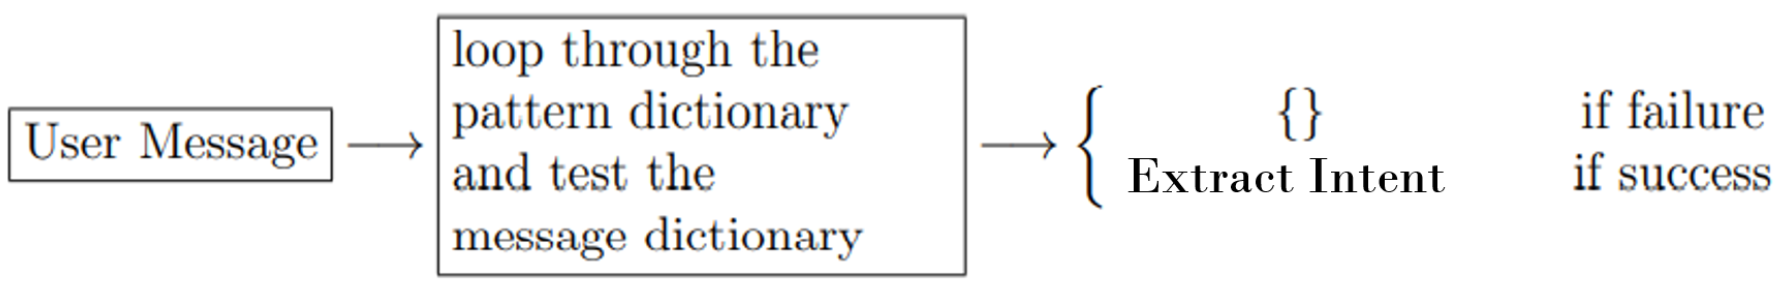

In [28]:
from IPython.display import Image

Image(filename='input_response_schema.png')

In [29]:
def matchPattern(user_msg):
    # in order to pass the message to pyspellchecker correct_typo, I need to parse it into a list of words
    user_msg_list = user_msg.split()
    user_msg_clean = correct_typo(user_msg_list)
    #print(user_msg_clean)

    
    # si non -> intention de undefined
    found_intent = 'undefined'

    for word in user_msg_clean:  # pour tous les mots du message

        # loop dans le pattern pour trouver si 1 keyword correspondant dans le dico -> et alors remplacer le undefined de défaut
        for intent, regex_keywords in regex_dict.items():
            # si oui -> renvoie la key de ce keyword
            match = re.search(regex_keywords, word)
            if match != None:
                found_intent = intent
                
    return found_intent
    
    
user_intent = matchPattern('helooo world doinn goodz')
print("helooo world doinn goodz :", user_intent)

user_intent = matchPattern('yeah')
print("yeah :", user_intent)

helooo world doinn goodz : greetings
yeah : affirmation


<span style="color:green; font-weight:bold;">4 - Main Function</span>

In [30]:
import random

def intent_search(user_msg):
        
    user_intention = matchPattern(user_msg)
    # print("-> found intention :", user_intention)
    
    if user_intention != 'undefined':
        response = chatbot_response(user_intention)
        print(f"Chatbot: {response}")
    return user_intention


def chatbot_response(user_intention):  # define bot looping responses
            return random.choice(responses[user_intention])  # return a random response for the matched intent

In [31]:
def main():
    print("Hi! I am Bot. To end conversation say 'bye' or 'leave'.")
    
    while True:
        # => switching loop that keeps in place the flow of the conversation
        
        # 1) Match your chatbot response to the user input and ask for its next message.
        user_msg = input("User : ")
        user_intention = intent_search(user_msg)
        
        # 2) Define a default response to the undefined intention from the user.
        if user_intention == 'undefined':  # undefined a remplacer comme categorie a la place de weather
            print("Chatbot: I did not understand. Could you tell me something else ?")
            # -> take a new message from user : easy, it loop again in the while
            
        # 3) For the exit case, reply back to the user and exit the console.
        if user_intention == 'ending':
            response = chatbot_response(user_intention)
            break
        

In [32]:
main()

Hi! I am Bot. To end conversation say 'bye' or 'leave'.
User : hey
Chatbot: Hey there, how's it going?
User : What time it is on your side ?
Chatbot: The time is 8:00 AM, bright and early!
User : thanks
Chatbot: Anytime! Happy to help!
User : badminton tennis swimming
Chatbot: I did not understand. Could you tell me something else ?
User : sorry
Chatbot: My bad! Please forgive me.
User : bye
Chatbot: Catch you later, take care!


<span style="color:green; font-weight:bold;">5 - Weather questions</span>

Step 1 : Add some keywords to my dictionnary, and extend them with wordnet library

In [33]:
weather_keywords = {
    'weather question': ['weather', 'rain', 'temperature', 'sunrise', 'cold']
}

In [34]:
# now extend with my WordNet function

extended_weather_dict = extend_keywords(weather_keywords)
extended_keywords_dict.update(extended_weather_dict)

for intent, keywords in extended_keywords_dict.items():
    print(intent, ' : ', keywords)
    print('----------')

greetings  :  ['how do you do', 'hi', 'hawaii', 'aloha_state', 'hullo', 'hey', 'hello', 'howdy']
----------
time  :  ['bit', 'second_base', 'time_of_day', 'hr', 'second', 'clip', 'secondment', 'fourth_dimension', 'hour', 'min', '2d', 'endorse', 'what time', 'mo', 'time', 'indorsement', 'minute', 'hours', 'prison_term', 'minute_of_arc', 'second_gear', 'arcsecond', '60_minutes', 'narrow', 'back', 'moment', 'sec', 'infinitesimal', 'meter', 'endorsement', 'secondly', 'clock_time', 'sentence', 'indorse', 'clock', 's', 'metre', 'irregular', 'arcminute', '2nd', 'instant']
----------
ending  :  ['catch you later', 'goodbye', 'word_of_farewell', 'leave', 'take care', 'au_revoir', 'good_day', 'parting', 'bye', 'farewell', 'arrivederci', 'see you', 'goodby', 'sayonara', 'pass', 'adios', 'auf_wiedersehen', 'cheerio', 'so_long', 'adieu']
----------
thanks  :  ['thanks a lot', 'thank', 'much appreciated', 'many thanks', 'thanks', 'thank you', 'give_thanks']
----------
apology  :  ['apologia', 'pitif

I see some strange assimilation like 'inhuman' to describe weather question, but hopefully my chatbot will be fine instead of this confusion of WordNet.

Here is an example of what I want to obtain : pattern : " What \\s is \\s the \\s weather \\s like \\s in \\s\\b [a-z ]+\\ b$"

In [35]:
weather_questions_dict = {
    'get weather': 'What is the weather like in',
    'get temperature': 'Which temperature in',
    'get night hour': 'What is the sunrise hour in'
}

/!\ I can define only 1 question per category because if I define multiple, then as a regex it will be multiplease groups called 'city' that are searched. It results in this error: redefinition of group name 'city' as group 3; was group 1 at position 95

In [37]:
def weather_to_regex(extended_weather_dict):
    regex_dict = {}
    
    for intent, sentence in extended_weather_dict.items():
            
        sentence_reg = sentence + ' (?P<city>[a-z]+) (?P<time>tomorrow|today)'
        
        regex_dict.update({intent : sentence_reg})
        
    return regex_dict

In [38]:
weather_regex_dict = word_to_regex(extended_weather_dict)
regex_dict.update(weather_regex_dict)  # I update my dico with this new regex for weather

for intent, keywords in regex_dict.items():
    print(intent, ' : ', keywords)
    print('----------')

print("My dictionnary of questions into regex :\n", weather_to_regex(weather_questions_dict))

greetings  :  .*\bhow do you do\b.*|.*\bhi\b.*|.*\bhawaii\b.*|.*\baloha state\b.*|.*\bhullo\b.*|.*\bhey\b.*|.*\bhello\b.*|.*\bhowdy\b.*
----------
time  :  .*\bbit\b.*|.*\bsecond base\b.*|.*\btime of day\b.*|.*\bhr\b.*|.*\bsecond\b.*|.*\bclip\b.*|.*\bsecondment\b.*|.*\bfourth dimension\b.*|.*\bhour\b.*|.*\bmin\b.*|.*\b2d\b.*|.*\bendorse\b.*|.*\bwhat time\b.*|.*\bmo\b.*|.*\btime\b.*|.*\bindorsement\b.*|.*\bminute\b.*|.*\bhours\b.*|.*\bprison term\b.*|.*\bminute of arc\b.*|.*\bsecond gear\b.*|.*\barcsecond\b.*|.*\b60 minutes\b.*|.*\bnarrow\b.*|.*\bback\b.*|.*\bmoment\b.*|.*\bsec\b.*|.*\binfinitesimal\b.*|.*\bmeter\b.*|.*\bendorsement\b.*|.*\bsecondly\b.*|.*\bclock time\b.*|.*\bsentence\b.*|.*\bindorse\b.*|.*\bclock\b.*|.*\bs\b.*|.*\bmetre\b.*|.*\birregular\b.*|.*\barcminute\b.*|.*\b2nd\b.*|.*\binstant\b.*
----------
ending  :  .*\bcatch you later\b.*|.*\bgoodbye\b.*|.*\bword of farewell\b.*|.*\bleave\b.*|.*\btake care\b.*|.*\bau revoir\b.*|.*\bgood day\b.*|.*\bparting\b.*|.*\bbye\b.*|.*\

<span style="color:green; font-weight:bold;">6 - Including entities</span>

Here I want to rewrite the regex pattern of the weather to capture groups city and time

In [39]:
def regex_capture_groups(questions_dict):
    regex_dict = {}
    sentence_reg = ''
    
    for intent, sentence in questions_dict.items():
        
        sentence_reg = sentence + ' (?P<city>[a-zA-Z\s]+) (?P<time>tomorrow|today).*'
        # \s -> enable space between alphanumeric => catch cities with 2 words

        regex_dict.update({intent : sentence_reg})
        
    return regex_dict

In [40]:
weather_questions_regex = regex_capture_groups(weather_questions_dict)

for intent, questions in weather_questions_regex.items():
    print(intent, ' : ', questions)
    print('----------')

get weather  :  What is the weather like in (?P<city>[a-zA-Z\s]+) (?P<time>tomorrow|today).*
----------
get temperature  :  Which temperature in (?P<city>[a-zA-Z\s]+) (?P<time>tomorrow|today).*
----------
get night hour  :  What is the sunrise hour in (?P<city>[a-zA-Z\s]+) (?P<time>tomorrow|today).*
----------


Get the entities from the input of the user to then enable the chatbot to get these 2 infos.

In [41]:
def matchPattern_weather(user_msg):

    # si non -> city et time not known
    city = 'undefined'
    time = 'undefined'
        
        
    # loop dans le pattern pour trouver si 1 entity correspondant dans le dico -> et alors remplacer le undefined de défaut
    for intent, regex_get_entity in weather_questions_regex.items():
        #print("-> ", regex_get_entity)

        match = re.search(regex_get_entity, user_msg)
        if match != None:
            city = match.groupdict()['city']  # equivalent to m.group(1) here
            time = match.groupdict()['time']

    return city, time
    

test1 = 'What is the weather like in Paris today'
user_entities = matchPattern_weather(test1)
print(test1, user_entities)

test2 = 'Which temperature in Abou Dabi today'
user_entities = matchPattern_weather(test2)
print(test2, user_entities)

What is the weather like in Paris today ('Paris', 'today')
Which temperature in Abou Dabi today ('Abou Dabi', 'today')


In [42]:
def createEntities(user_msg):  # aim to extract entities from the user message

    entities_dict = {}
    
    city, time = matchPattern_weather(user_msg)
    
    entities_dict = {'city': city, 'time': time}
    
    return entities_dict

In [43]:
print(createEntities('What is the weather like in Dublin today'))
print(createEntities('Which temperature in Abou Dabi today'))
print(createEntities('What is the sunrise hour in Paris tomorrow'))

{'city': 'Dublin', 'time': 'today'}
{'city': 'Abou Dabi', 'time': 'today'}
{'city': 'Paris', 'time': 'tomorrow'}


Let's test my chatbot right now before going further, to be sure it works well

In [44]:
def new_intent_search(user_msg):
        
    user_intention = matchPattern(user_msg)
    # print("-> found intention :", user_intention)
    
    if user_intention != 'undefined' and user_intention != 'weather question':
        response = chatbot_response(user_intention)
        print(f"Chatbot: {response}")
        
    return user_intention

In [47]:
def main_weather():
    print("Hi! I am Bot. To end conversation say 'bye' or 'leave'.")
    
    while True:
        # => switching loop that keeps in place the flow of the conversation
        
        # 1) Match your chatbot response to the user input and ask for its next message.
        user_msg = input("User : ")
        user_intention = new_intent_search(user_msg)
        
        # 3) For the exit case, reply back to the user and exit the console.
        if user_intention == 'ending':
            response = chatbot_response(user_intention)
            break
        
        # 2) Define a default response to the undefined intention from the user.
        if user_intention == 'undefined':
            print("Chatbot: I did not understand. Could you tell me something else ?")
            # -> take a new message from user : easy, it loop again in the while     
            
        # 4) New : Call weather functions if intention detected is a question about weather
        if user_intention == 'weather question':
            city_time = createEntities(user_msg)
            print("-> found entities :", city_time)
            
            # chatbot must ask the user about the city and time until success
            if city_time['city'] == 'undefined' or city_time['time'] == 'undefined':
                print("Chatbot: Please type your weather question again, with a town and a time")
                matchPattern_weather(user_msg)

In [48]:
main_weather()

Hi! I am Bot. To end conversation say 'bye' or 'leave'.
User : Which temperature in ?
-> found entities : {'city': 'undefined', 'time': 'undefined'}
Chatbot: Please type your weather question again, with a town and a time
User : What is the weather like in Paris ?
-> found entities : {'city': 'undefined', 'time': 'undefined'}
Chatbot: Please type your weather question again, with a town and a time
User : What is the weather like in Los Angeles today ?
-> found entities : {'city': 'Los Angeles', 'time': 'today'}
User : leave
Chatbot: Bye, and feel free to come back anytime!


<span style="color:green; font-weight:bold;">7 - Weather API</span>

In [49]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [50]:
import requests
from datetime import datetime

API_KEY = 'YMAQuHpAQpDjBSOzvmtZ7Y1VBU9nFCjM'

def getWeather(location, date):

    url = "https://api.tomorrow.io/v4/weather/forecast"
    params = {
        "location": location,
        "apikey": API_KEY,
        "timesteps": "1d",
        "units": "metric"
    }
    
    try:
        response = requests.get(url, params=params)
        if response.status_code == 200:  #  OK
            data = response.json()
            
            forecast = data.get('timelines', {}).get('daily', [{}])[0]
            values = forecast.get('values', {})
            temp_celsius = values.get('temperatureAvg', "No temperature data")
            humidity = values.get('humidityAvg', "No humidity data")
            
            return {
                "Location": location,
                "Date": date,
                "Temperature (°C)": temp_celsius,
                "Humidity (%)": humidity
            }
        
        elif response.status_code == 400:  # Bad request
            return {"error": "Bad Request. the request was invalid."}
        
        elif response.status_code == 404:  # Not found
            return {"error": "Location not found. Please check your town's name or location coordinates or."}
        
        else:
            return {"error": f"An unexpected error occurred. Status code: {response.status_code}"}
    
    except requests.exceptions.RequestException as e:
        return {"error": str(e)}

In [51]:
def process_weather_response(weather_info_json):
    
    #response = f"{weather_info_json['Date']} in {weather_info_json['Location']} you have {weather_info_json['Weather']} with {weather_info_json['Temperature (°C)']} °C and {weather_info_json['Humidity (%)']} % humidity"
    response = f"{weather_info_json['Date']} in {weather_info_json['Location']} you have {weather_info_json['Temperature (°C)']} °C and {weather_info_json['Humidity (%)']} % humidity"

    return response

Finally, let's test this weather chatbot indicating the temperature in a town :

In [53]:
def main_API():
    print("Hi! I am Bot. To end conversation say 'bye' or 'leave'.")
    
    while True:
        # => switching loop that keeps in place the flow of the conversation
        
        # 1) Match your chatbot response to the user input and ask for its next message.
        user_msg = input("User : ")
        user_intention = new_intent_search(user_msg)
        
        # 3) For the exit case, reply back to the user and exit the console.
        if user_intention == 'ending':
            response = chatbot_response(user_intention)
            break
        
        # 2) Define a default response to the undefined intention from the user.
        if user_intention == 'undefined':
            print("Chatbot: I did not understand. Could you tell me something else ?")
            # -> take a new message from user : easy, it loop again in the while     
            
        # 4) New : Call weather functions if intention detected is a question about weather
        if user_intention == 'weather question':
            city_time = createEntities(user_msg)
            
            #result = getWeather("Paris", today)
            weather_info_json = getWeather(city_time['city'], city_time['time'])
            # print(result)
            weather_response = process_weather_response(weather_info_json)
            print(weather_response)

In [55]:
main_API()

Hi! I am Bot. To end conversation say 'bye' or 'leave'.
User : Can you help me with meteorology ?
Chatbot: How can I assist you today?
User : What is the weather like in Los Angeles today ?
today in Los Angeles you have 13.18 °C and 30.38 % humidity
User : What is the weather like in Paris tomorrow ?
tomorrow in Paris you have 9.1 °C and 92.37 % humidity
User : parting
Chatbot: Take care, hope to chat soon!


<span style="color:green; font-weight:bold;">8 - Small project </span>

In [56]:
def detailed_temperature_response(weather_info_json):
    
    temperature = weather_info_json['Temperature (°C)']
    city = weather_info_json['Location']
    
    # add color with the syntax described in https://stackoverflow.com/questions/68843711/how-to-return-colored-text-from-a-function
    
    if temperature < 0:
        return f'\033[34m🥶 It is very cold in {city} with only {temperature} °C, hope you enjoy ice skating\033[0m'
    else:
        if temperature > 30:
            return f'\033[31m🥵 It is kind of hot in {city} with {temperature} °C, so you would better drink water\033[0m'
        else :
            if temperature < 15:
                return f'\033[32m🙂 It is a little bit cold in {city} with {temperature} °C, but no worries about snow\033[0m'
            else:
                return f'\033[35m🌸 It is cool today, {temperature} °C in {city}. Have fun!\033[0m'

In [57]:
def main_API_detailed():
    print("Hi! I am Bot. To end conversation say 'bye' or 'leave'.")
    
    while True:
        # => switching loop that keeps in place the flow of the conversation
        
        # 1) Match your chatbot response to the user input and ask for its next message.
        user_msg = input("User : ")
        user_intention = new_intent_search(user_msg)
        
        # 3) For the exit case, reply back to the user and exit the console.
        if user_intention == 'ending':
            response = chatbot_response(user_intention)
            break
        
        # 2) Define a default response to the undefined intention from the user.
        if user_intention == 'undefined':
            print("Chatbot: I did not understand. Could you tell me something else ?")
            # -> take a new message from user : easy, it loop again in the while     
            
        # 4) New : Call weather functions if intention detected is a question about weather
        if user_intention == 'weather question':
            city_time = createEntities(user_msg)
            
            #result = getWeather("Paris", today)
            weather_info_json = getWeather(city_time['city'], city_time['time'])
            # print(result)
            weather_response = detailed_temperature_response(weather_info_json)
            print(weather_response)

In [62]:
main_API_detailed()

Hi! I am Bot. To end conversation say 'bye' or 'leave'.
User : hi
Chatbot: Hello! How can I help you today?
User : Which temperature in Dublin tomorrow ?
🙂 It is a little bit cold in Dublin with 10.31 °C, but no worries about snow
User : What is the weather like in Cape Town today ?
🌸 It is cool today, 17.88 °C in Cape Town. Have fun!
User : thank a lot
Chatbot: Anytime! Happy to help!
User : bye
Chatbot: Take care, hope to chat soon!
